# El tratamiento de las variables categóricas

In [8]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [9]:
df = pd.read_csv("../datasets/ecom-expense/Ecom Expense.csv")

In [10]:
df.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485


In [11]:
dummy_gender = pd.get_dummies(df["Gender"], prefix="Gender")
dummy_city_tier = pd.get_dummies(df["City Tier"], prefix="City")

In [12]:
dummy_gender.head()

,Gender_Female,Gender_Male
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [13]:
dummy_city_tier.head()

,City_Tier 1,City_Tier 2,City_Tier 3
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0


In [14]:
column_names = df.columns.values.tolist()
column_names

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend']

In [15]:
df_new = df[column_names].join(dummy_gender)
column_names = df_new.columns.values.tolist()
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0


In [16]:
df_new = df_new[column_names].join(dummy_city_tier)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0


In [17]:
feature_cols = ["Monthly Income", "Transaction Time",
               "Gender_Female", "Gender_Male",
               "City_Tier 1", "City_Tier 2", "City_Tier 3",
               "Record"]

In [18]:
X = df_new[feature_cols]
Y = df_new["Total Spend"]

In [19]:
lm = LinearRegression()

In [20]:
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [21]:
print(lm.intercept_)
print(lm.coef_)

-79.41713030137362
[ 1.47538980e-01  1.54946125e-01 -1.31025013e+02  1.31025013e+02
  7.67643260e+01  5.51389743e+01 -1.31903300e+02  7.72233446e+02]


In [22]:
list(zip(feature_cols, lm.coef_))

[('Monthly Income', 0.14753898049205738),
 ('Transaction Time', 0.15494612549589545),
 ('Gender_Female', -131.02501325554567),
 ('Gender_Male', 131.0250132555456),
 ('City_Tier 1', 76.76432601049527),
 ('City_Tier 2', 55.138974309232474),
 ('City_Tier 3', -131.9033003197278),
 ('Record', 772.2334457445648)]

In [23]:
lm.score(X,Y)

0.9179923586131016

El modelo puede ser escrito como:
* Total_Spend = -79.41713030137453 + 0.14753898049205744 * Monthly Income + 0.154946125495895 * Transaction Time 
    -131.02501325554584 * Gender_Female + 131.02501325554596 * Gender_Male + 76.76432601049525 * City_Tier 1 +
    55.13897430923255 * City_Tier 2 - 131.90330031972792 * City_Tier 3 + 772.2334457445648 * Record

In [24]:
df_new["prediction"] = -79.41713030137453 + 0.14753898049205744 * df_new["Monthly Income"] + 0.154946125495895 * df_new["Transaction Time"] - 131.02501325554584 * df_new["Gender_Female"] + 131.02501325554596 * df_new["Gender_Male"] + 76.76432601049525 * df_new["City_Tier 1"] + 55.13897430923255 * df_new["City_Tier 2"] - 131.90330031972792 * df_new["City_Tier 3"] + 772.2334457445648 * df_new["Record"]

In [25]:
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3,prediction
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0,4903.696720
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0,4799.434826
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0,5157.082504
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0,8068.012996
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0,3581.980335


In [26]:
SSD = np.sum((df_new["prediction"] - df_new["Total Spend"])**2)

In [27]:
SSD

1517733985.340816

In [28]:
RSE = np.sqrt(SSD/(len(df_new)-len(feature_cols)-1))

In [29]:
RSE

803.1318809818165

In [30]:
sales_mean = np.mean(df_new["Total Spend"])

In [31]:
sales_mean

6163.176415976715

In [32]:
error = RSE/sales_mean

In [33]:
error

0.1303113568029416

## Eliminar Variables Dummy Redundantes

In [34]:
dummy_gender = pd.get_dummies(df["Gender"], prefix="Gender").iloc[:,1:]
dummy_gender.head()

,Gender_Male
0,0
1,0
2,1
3,0
4,0


In [35]:
dummy_city_tier = pd.get_dummies(df["City Tier"], prefix="City").iloc[:,1:]
dummy_city_tier

,City_Tier 2,City_Tier 3
0,0,0
1,1,0
2,1,0
3,0,0
4,1,0
5,1,0
6,0,0
7,0,1
8,0,0
9,1,0


In [36]:
column_names = df.columns.values.tolist()
df_new = df[column_names].join(dummy_gender)
column_names = df_new.columns.values.tolist()
df_new = df_new[column_names].join(dummy_city_tier)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Male,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,0,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,1,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,0,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,0,1,0


In [37]:
feature_cols = ["Monthly Income", "Transaction Time",
                "Gender_Male",
               "City_Tier 2", "City_Tier 3",
               "Record"]

In [38]:
X = df_new[feature_cols]
Y = df_new["Total Spend"]
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [39]:
print(lm.intercept_)

-133.67781754642056


In [40]:
list(zip(feature_cols, lm.coef_))

[('Monthly Income', 0.14753898049205744),
 ('Transaction Time', 0.15494612549589631),
 ('Gender_Male', 262.05002651109595),
 ('City_Tier 2', -21.62535170126296),
 ('City_Tier 3', -208.66762633022324),
 ('Record', 772.2334457445635)]

In [41]:
lm.score(X,Y)

0.9179923586131016

## Transformación de variables para conseguir una relación no lineal

In [42]:
import pandas as pd

In [43]:
data_auto = pd.read_csv("../datasets/auto/auto-mpg.csv")
data_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [44]:
data_auto.shape

(406, 9)

In [45]:
import matplotlib.pyplot as plt

Text(0.5,1,'CV vs MPG')

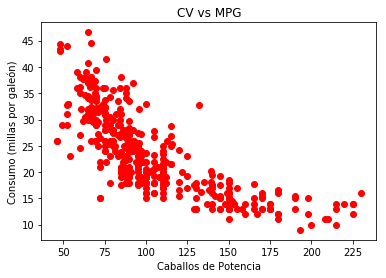

In [46]:
%matplotlib inline
data_auto["mpg"] = data_auto["mpg"].dropna()
data_auto["horsepower"] = data_auto["horsepower"].dropna()
plt.plot(data_auto["horsepower"], data_auto["mpg"], "ro")
plt.xlabel("Caballos de Potencia")
plt.ylabel("Consumo (millas por galeón)")
plt.title("CV vs MPG")

## Modelo de regresión lineal

* mpg = a + b * horsepower

In [47]:
X = data_auto["horsepower"].fillna(data_auto["horsepower"].mean())
Y = data_auto["mpg"].fillna(data_auto["mpg"].mean())
X_data = X[:, np.newaxis]

In [48]:
lm = LinearRegression()
lm.fit(X[:, np.newaxis],Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [49]:
type(X)

pandas.core.series.Series

In [50]:
type(X[:, np.newaxis])

numpy.ndarray

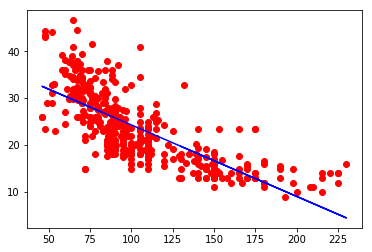

In [51]:
%matplotlib inline
plt.plot(X,Y,"ro")
plt.plot(X, lm.predict(X[:, np.newaxis]), color="blue")

In [52]:
lm.score(X_data, Y)

0.5746533406450252

In [53]:
SSD = np.sum((Y - lm.predict(X_data))**2)
RSE = np.sqrt(SSD/(len(X_data)-1))
y_mean = np.mean(Y)
error = RSE/y_mean
SSD, RSE, y_mean, error*100

(10315.751960060918, 5.046879480825511, 23.514572864321607, 21.462773361633474)

## Modelo de regresión cuadrático
 * mpg = a + b * horsepower ²

In [54]:
X_data = X**2
X_data = X_data[:,np.newaxis]

In [55]:
lm = LinearRegression()
lm.fit(X_data, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [56]:
lm.score(X_data,Y)

0.4849887034823205

In [57]:
SSD = np.sum((Y - lm.predict(X_data))**2)
RSE = np.sqrt(SSD/(len(X_data)-1))
y_mean = np.mean(Y)
error = RSE/y_mean
SSD, RSE, y_mean, error*100

(12490.350340501926, 5.553410772769817, 23.514572864321607, 23.616889852998113)

## Modelo de regresión cuadrático
 * mpg = a + b * horsepower + C * horsepower ²

In [58]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [59]:
poly = PolynomialFeatures(degree=2)

In [60]:
X_data = poly.fit_transform(X[:,np.newaxis])

In [61]:
lm = linear_model.LinearRegression()
lm.fit(X_data, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [62]:
lm.score(X_data,Y)

0.6439066584257469

In [63]:
lm.intercept_

55.02619244708036

In [64]:
lm.coef_

array([ 0.        , -0.43404318,  0.00112615])

mpg = 55.026192447080355 - 0.43404318 hp + 0.00112615 hp²

In [65]:
for d in range(2,6):
    poly = PolynomialFeatures(degree=d)
    X_data = poly.fit_transform(X[:,np.newaxis])
    lm = linear_model.LinearRegression()
    lm.fit(X_data, Y)
    print("Regresión de grado " + str(d))
    print(lm.score(X_data, Y))
    print(lm.intercept_)
    print(lm.coef_)

Regresión de grado 2
0.6439066584257469
55.02619244708036
[ 0.         -0.43404318  0.00112615]
Regresión de grado 3
0.6444678885560744
58.448774111918084
[ 0.00000000e+00 -5.27113167e-01  1.89736722e-03 -1.95723195e-06]
Regresión de grado 4
0.6467674189704502
40.09664384818936
[ 0.00000000e+00  1.62563541e-01 -7.10892744e-03  4.65580255e-05
 -9.15840093e-08]
Regresión de grado 5
0.6547512489367358
-40.693812902382106
[ 0.00000000e+00  4.00021432e+00 -7.54801920e-02  6.19621369e-04
 -2.36220932e-06  3.41982935e-09]


## El problema de los outliers

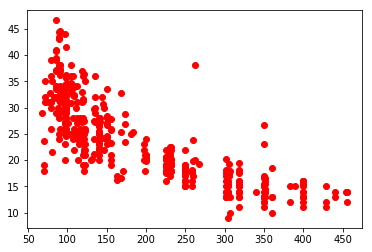

In [68]:
plt.plot(data_auto["displacement"], data_auto["mpg"], "ro")

In [70]:
X = data_auto["displacement"].fillna(data_auto["displacement"].mean())
X = X[:,np.newaxis]
Y = data_auto["mpg"].fillna(data_auto["mpg"].mean())

lm = LinearRegression()
lm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [71]:
lm.score(X,Y)

0.6261049762826918

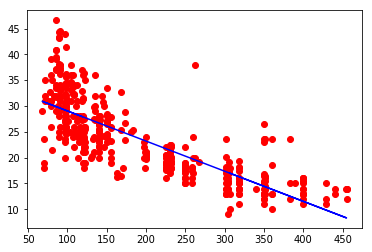

In [72]:
%matplotlib inline
plt.plot(X,Y,"ro")
plt.plot(X, lm.predict(X), color="blue")

In [73]:
data_auto[(data_auto["displacement"]>250)&(data_auto["mpg"]>35)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
395,38.0,6,262.0,85.0,3015,17.0,82,1,oldsmobile cutlass ciera (diesel)


In [74]:
data_auto[(data_auto["displacement"]>300)&(data_auto["mpg"]>19)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
257,19.4,8,318.0,140.0,3735,13.2,78,1,dodge diplomat
258,20.2,8,302.0,139.0,3570,12.8,78,1,mercury monarch ghia
269,19.2,8,305.0,145.0,3425,13.2,78,1,chevrolet monte carlo landau
305,23.0,8,350.0,125.0,3900,17.4,79,1,cadillac eldorado
372,26.6,8,350.0,105.0,3725,19.0,81,1,oldsmobile cutlass ls


In [81]:
data_auto_clean = data_auto.drop([257,258,269,305,372,395])

In [82]:
X = data_auto_clean["displacement"].fillna(data_auto_clean["displacement"].mean())
X = X[:,np.newaxis]
Y = data_auto_clean["mpg"].fillna(data_auto_clean["mpg"].mean())

lm = LinearRegression()
lm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [83]:
lm.score(X,Y)

0.6467715683453986

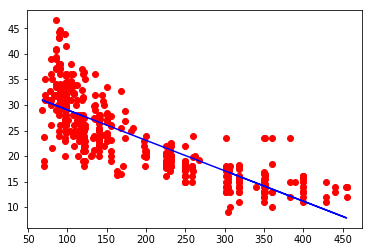

In [84]:
%matplotlib inline
plt.plot(X,Y,"ro")
plt.plot(X, lm.predict(X), color="blue")